# IS 362 Week 12 Assignment 8

Professor Charles Pak

Angela Hernandez

4/11/24


Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository
here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the
data science community has made it a good dataset to use for comparative benchmarking. For example, if someone
was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data,
this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute
or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”
Your assignment is to

    • First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to
    look around a bit, but it’s there!
    • Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column
    that indicates edible or poisonous, the column that includes odor, and at least one other column of your
    choosing.
    • Add meaningful names for each column.
    • Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might
    become 0 and “p” might become 1. This is because your downstream processing in Project 4 using
    scikit-learn requires that values be stored as numerics.
    • Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and
    show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
    • Include some text describing your preliminary conclusions about whether either of the other columns
    could be helpful in predicting if a specific mushroom is edible or poisonous.
    
Your deliverable is a Jupyter Notebook that performs these transformation and exploratory data analysis tasks.

In [5]:
import pandas as pd

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

In [7]:
col_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
             'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
             'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
             'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [8]:
df = pd.read_csv(url, names=col_names, usecols=['class', 'odor', 'cap-color'])

In [9]:
print(df.head())

  class cap-color odor
0     p         n    p
1     e         y    a
2     e         w    l
3     p         w    p
4     e         g    n


In [10]:
df.columns = ['Edible/Poisonous', 'Odor', 'Cap Color']

In [11]:
df['Edible/Poisonous'] = df['Edible/Poisonous'].map({'e': 0, 'p': 1})
df['Odor'] = df['Odor'].astype('category').cat.codes
df['Cap Color'] = df['Cap Color'].astype('category').cat.codes

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

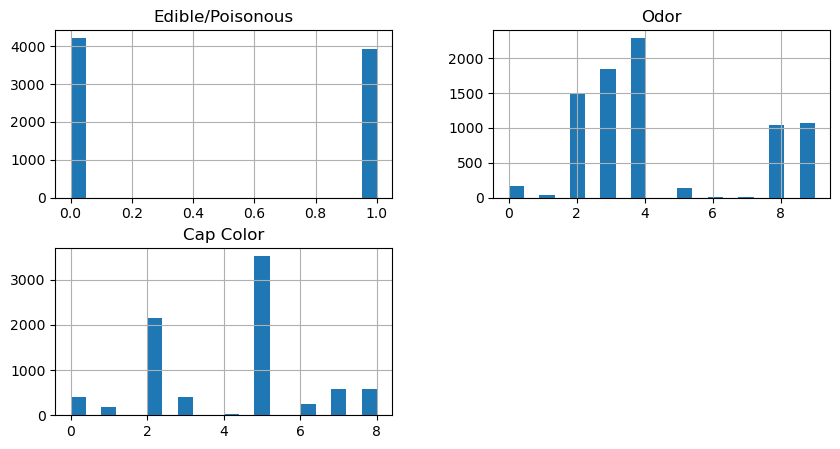

In [13]:
df.hist(bins=20, figsize=(10, 5))
plt.show()

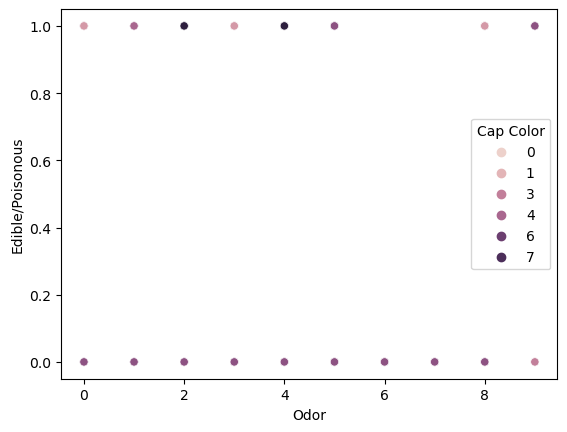

In [14]:
sns.scatterplot(data=df, x='Odor', y='Edible/Poisonous', hue='Cap Color')
plt.show()

# Analysis and Conclusions

Histograms Analysis:
   1. The 'Cap Color' histogram demonstrates that some colors are more prevalent than others. This might indicate a           pattern or correlation between cap color and edibility, which could be further investigated.
   2. The 'Odor' histogram displays a varied distribution of odors. Certain odors seem to be more common than others, and     if these are linked to either poisonous or edible mushrooms, odor could be a strong predictor.

Scatter Plot Analysis:
   1. The scatter plot with 'Odor' on the x-axis and 'Edible/Poisonous' on the y-axis, colored by 'Cap Color', suggests       there is a clear distinction between some of the odor values in relation to mushroom edibility. Some odors are possibly     only present in poisonous mushrooms and vice versa.
   2. The discrete nature of the 'Edible/Poisonous' variable, being binary, creates a two-level scatter plot, which is not   very informative on its own. However, when combined with the hue 'Cap Color', it does not show a distinct pattern           suggesting that 'Cap Color' varies independently of the 'Edible/Poisonous' class across odors.
   3. There are some odors (possibly corresponding to the codes 0, 3, 5 on the x-axis) that are exclusively associated        with one class (edible or poisonous).

Conclusions:

   1. Odor appears to be a significant predictor of mushroom edibility. Some odors are strongly associated with edibility or poisonousness, which suggests that odor is a critical feature in determining whether a mushroom is safe to eat.
   2. Cap color does not appear to show a clear pattern in relation to the edibility from this scatter plot alone. It may not be a strong predictor on its own, but it could contribute additional value when used alongside other features